In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [ ]:
#analysis: find and make one change/recommendation that can be implemented to reduce churn
#
#2. create the four steps walk through what we learned in class
#
#3. prepare and create: notes on story framework, audience, setting, brainstorm, & types of visualization
#
#4. talk and listen: show transcript of conversations at this stage and questions that will need to be answered
#
#5. prototype: Your prototype is what you will be referencing when you go to 
# build your charts and slideshow. The level of detail for charts here will be much more refined 
# than it was in your sketches. In your prototype, you will work out details such as slide names, 
# axes, titles of charts, and bullets for ideas your chart is conveying. You’ve reached the prototype 
# stage after you’ve sketched, and you’ve answered the questions from Talk and Listen that indicated you 
# were ready to move on to prototype.

In [ ]:
# i think there are going to be a few factors that impact churn
# contract type
# cost basis
# type of service
# tenure
#what i want to explore are thresholds for each of these factors that will reduce churn
#at what tenure does churn markedly drop?
#at what cost basis?
#at what service level?
#at what contract type?
#payment type?
#type of housefhold

In [4]:
df = pd.read_csv('spreadsheet_exercises_TimK.csv')

In [49]:
df = df.dropna()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7038 non-null   object 
 1   gender                     7038 non-null   object 
 2   is_senior_citizen          7038 non-null   int64  
 3   partner                    7038 non-null   object 
 4   dependents                 7038 non-null   object 
 5   phone_service              7038 non-null   int64  
 6   internet_service           7038 non-null   int64  
 7   contract_type              7038 non-null   int64  
 8   payment_type               7038 non-null   object 
 9   monthly_charges            7038 non-null   float64
 10  total_charges              7038 non-null   float64
 11  churn                      7038 non-null   object 
 12  tenure                     7038 non-null   float64
 13  is_female                  7038 non-null   bool 

In [51]:
pd.crosstab(df.payment_type, df.churn,normalize=True )

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.182864,0.036800
Credit card (automatic),0.183433,0.032964
Electronic check,0.183859,0.152174
Mailed check,0.184143,0.043762


In [53]:
pd.crosstab(df.partner, df.churn, normalize=True )

churn,No,Yes
partner,,
No,0.346689,0.170503
Yes,0.387610,0.095197


In [54]:
pd.crosstab(df.dependents, df.churn, normalize=True)

churn,No,Yes
dependents,,
No,0.481813,0.219238
Yes,0.252487,0.046462


In [55]:
pd.crosstab(df.partner_dependents, df.churn,normalize=True )

churn,No,Yes
partner_dependents,,
0,0.306621,0.159562
1,0.175192,0.059676
2,0.040068,0.010941
3,0.212418,0.035521


In [56]:
pd.crosstab(df.contract_type, df.churn, normalize=True)

churn,No,Yes
contract_type,,
0,0.315431,0.235294
1,0.185990,0.023586
2,0.232879,0.006820


In [57]:
pd.crosstab(df.internet_service, df.churn, normalize=True )

churn,No,Yes
internet_service,,
0,0.200341,0.016056
1,0.278062,0.065359
2,0.255897,0.184285


In [58]:
pd.crosstab(df.has_phone_and_internet, df.churn, normalize=True)

churn,No,Yes
has_phone_and_internet,,
False,0.272805,0.040352
True,0.461495,0.225348


In [60]:
pd.crosstab(df.phone_service_type, df.churn, )

churn,No,Yes
phone_service_type,,
No Phone Service,510,171
One Line,2541,849
Two or More Lines,2117,850


In [67]:
pd.crosstab(df.internet_service_type, df.churn, normalize=True)

churn,No,Yes
internet_service_type,,
DSL,0.278062,0.065359
Fiber Optic,0.255897,0.184285
No Internet Service,0.200341,0.016056


In [62]:
pd.crosstab(df.service_type, df.churn, )

churn,No,Yes
service_type,,
Interent_and_Phone,3248,1586
Internet_Only,510,171
Phone_Only,1410,113


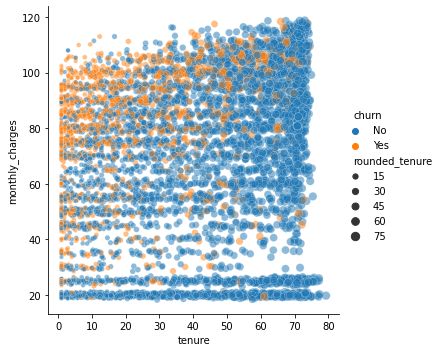

In [63]:
sns.relplot(data=df, x='tenure' , y='monthly_charges', hue='churn', size='rounded_tenure',kind='scatter', alpha =0.5)

In [64]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

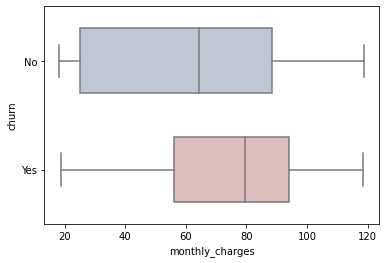

In [65]:
sns.boxplot(data=df, y='churn',x='monthly_charges',whis=[0, 100], width=.6, palette="vlag")



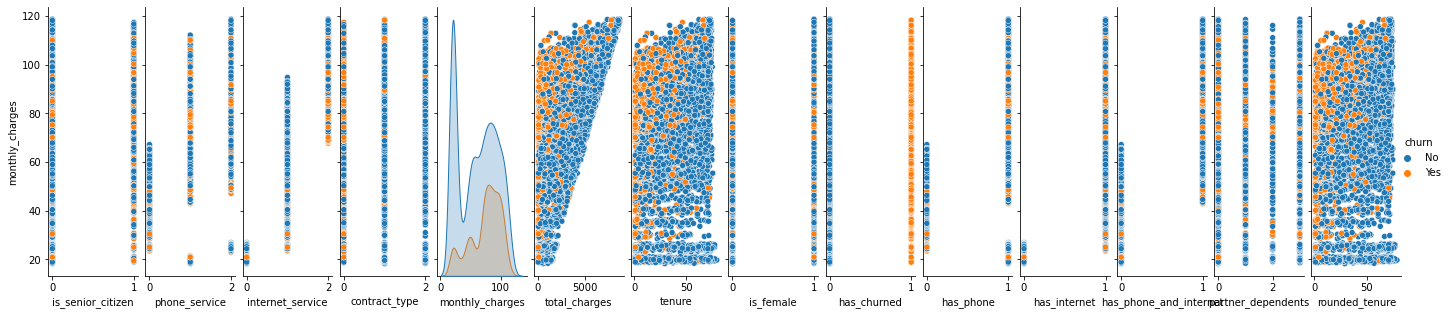

In [66]:
sns.pairplot(df, hue='churn', y_vars='monthly_charges').fig.set_size_inches(20,5
                                                                           )

In [77]:
df.groupby('churn').rounded_tenure.value_counts()

churn  rounded_tenure
No     1.0               234
       71.0              172
       70.0              142
       72.0              141
       3.0               112
       2.0               111
       73.0              103
       69.0               91
       68.0               88
       4.0                86
       5.0                85
       9.0                85
       67.0               83
       63.0               82
       60.0               80
       64.0               78
       66.0               77
       8.0                76
       11.0               76
       7.0                74
       12.0               74
       13.0               74
       21.0               73
       52.0               72
       23.0               69
       51.0               68
       61.0               68
       17.0               67
       54.0               67
       25.0               65
       46.0               65
       65.0               65
       24.0               64
       6.0           